In [1]:
import numpy as np
import pandas as pd
import scipy

In [2]:
from ecoevocrm.consumer_resource_system import *
from ecoevocrm.consumer_resource_system import *
import ecoevocrm.utils as utils
import ecoevocrm.viz as viz
import ecoevocrm.coarse_graining as cg
import ecoevocrm.strain_pool

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

----

## Model parameters

### Traits

In [4]:
L = 10

In [5]:
sigma_allphenos = utils.binary_combinations(L, exclude_all_zeros=True)
sigma_allphenos = sigma_allphenos/sigma_allphenos.sum(axis=1, keepdims=1)

In [6]:
sigma = sigma_allphenos[0]

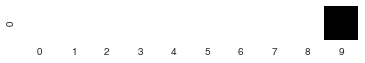

In [7]:
viz.matrix_plot(sigma)

### Costs

In [8]:
chi = 0.4

In [9]:
xi = 0.1

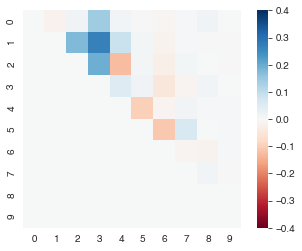

In [10]:
J = utils.random_matrix((L, L), 'tikhonov_sigmoid', args={'n_star': 5, 'delta': 1}, triangular=True, diagonal=0)
viz.matrix_plot(J, vmin=-0.4, vmax=0.4)
# J = None

### Environment

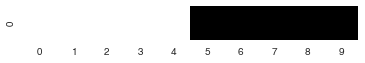

In [11]:
R_init = np.ones(L)
R_init[:5] = 0
viz.matrix_plot(R_init)

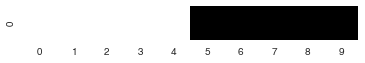

In [12]:
rho = np.ones(L)
rho[:5] = 0
viz.matrix_plot(rho)

In [13]:
tau = 1

### Cross-feeding

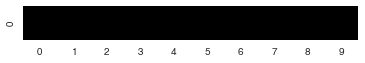

In [14]:
omega = np.ones(L)
omega[:5] = 1
viz.matrix_plot(omega, vmin=0)

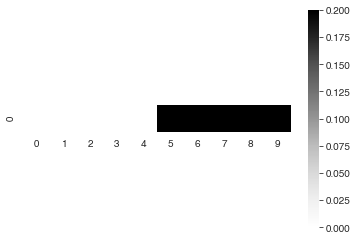

In [15]:
lamda = np.zeros(L)
lamda[5:] = 0.2
viz.matrix_plot(lamda, vmin=0)

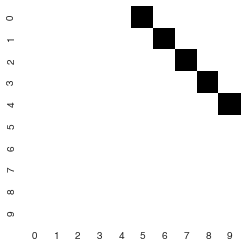

In [16]:
D = utils.random_matrix((L, L), 'binomial', args={'p': 0.0}, diagonal=0)
D += np.diag(np.array([1]*5), 5)
viz.matrix_plot(D)

## Simulate model

In [17]:
system = ConsumerResourceSystem(type_set=TypeSet(sigma=sigma, lamda=lamda, xi=xi, chi=chi, J=J, binarize_traits_J_cost_terms=True, mu=1e-10), 
                                rho=rho, tau=tau, omega=omega, D=D,
                                resource_influx_mode='none', resource_dynamics_mode='explicit',
                                N_init=1, R_init=R_init)

In [18]:
T_total = 1e6

In [19]:
system.run(T=T_total)

<AxesSubplot:>

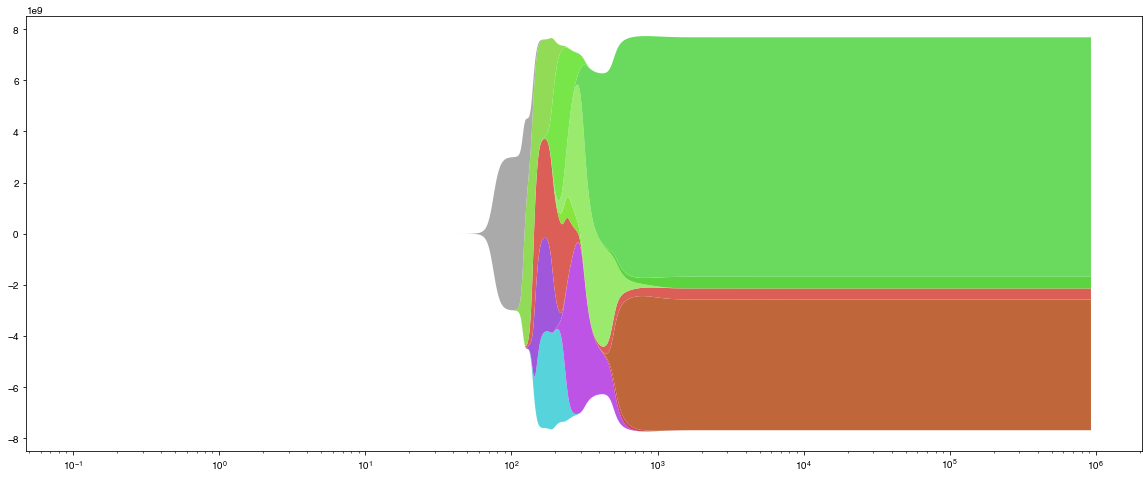

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
viz.stacked_abundance_plot(system, ax=ax, relative_abundance=False, apply_palette_depth=1, log_x_axis=True)

<AxesSubplot:>

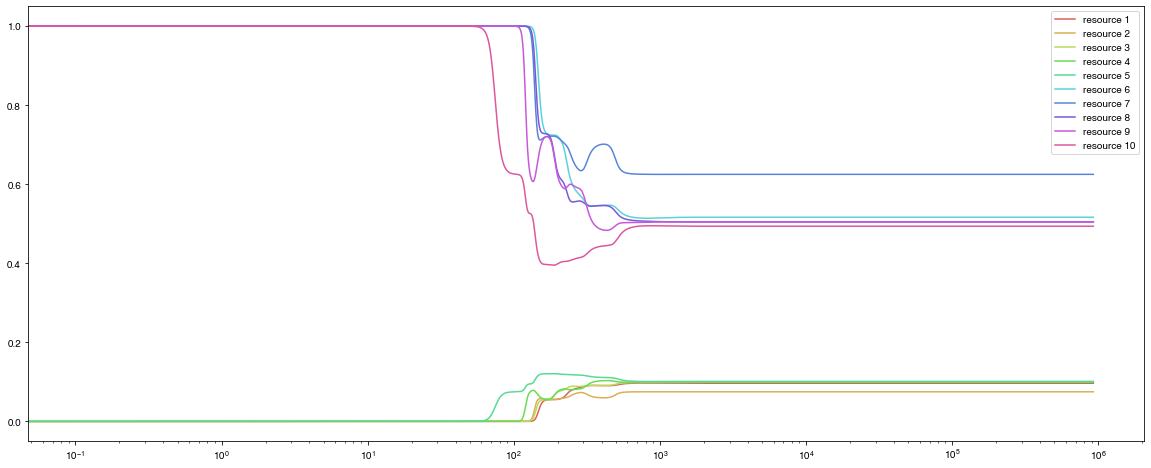

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
viz.resource_plot(system, ax=ax, stacked=False, relative=False, log_x_axis=True, log_y_axis=False)

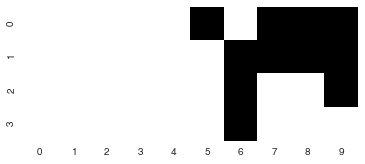

In [22]:
viz.matrix_plot(system.extant_type_set.sigma)

---------
---------